# **1. Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import kagglehub
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import joblib

# **2. Load the Dataset**

In [ ]:
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-and-real-news-dataset' dataset.
Path to dataset files: /kaggle/input/fake-and-real-news-dataset


In [ ]:
fake = pd.read_csv(os.path.join(path, "Fake.csv"))
real = pd.read_csv(os.path.join(path, "True.csv"))

In [ ]:
fake['label'] = 0   # Fake news
real['label'] = 1   # Real news

In [ ]:
df = pd.concat([fake, real], axis=0)
df = df[['text', 'label']]
df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


# **3. Inspect and Clean the Data**


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


# **4. Text Preprocessing**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

,text,label,cleaned_text
0,Donald Trump just couldn t wish all Americans ...,0,donald trump wish americans happy new year lea...
1,House Intelligence Committee Chairman Devin Nu...,0,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",0,friday revealed former milwaukee sheriff david...
3,"On Christmas day, Donald Trump announced that ...",0,christmas day donald trump announced would bac...
4,Pope Francis used his annual Christmas Day mes...,0,pope francis used annual christmas day message...


# **5. Text Vectorization (TF-IDF)**

In [ ]:
vectorizer = TfidfVectorizer(max_features=8000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# **6. Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# **7. Model Training**

In [ ]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)


LogisticRegression(max_iter=300)

# **8. Model Evaluation**

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9863028953229399
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# **Bonus (Visualization):**

In [ ]:
fake_text = ' '.join(df[df['label'] == 0]['cleaned_text'])
real_text = ' '.join(df[df['label'] == 1]['cleaned_text'])

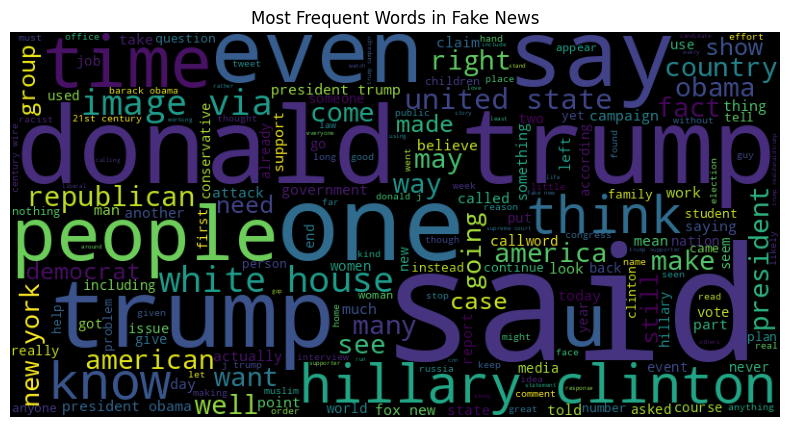

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(WordCloud(width=800, height=400).generate(fake_text))
plt.title("Most Frequent Words in Fake News")
plt.axis('off')
plt.show()

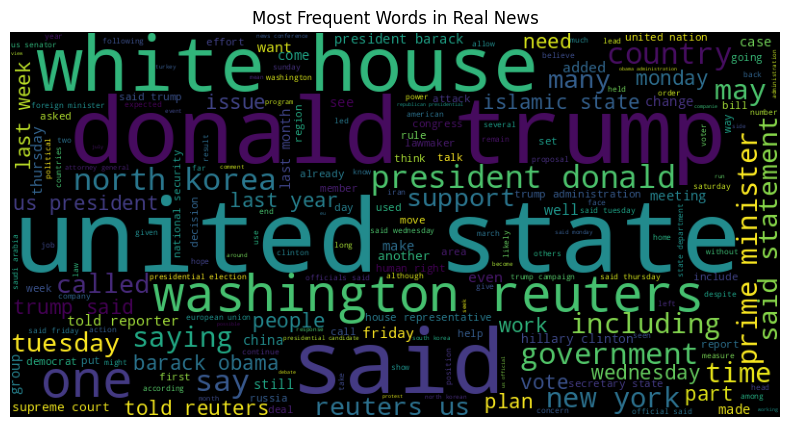

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(WordCloud(width=800, height=400).generate(real_text))
plt.title("Most Frequent Words in Real News")
plt.axis('off')
plt.show()

# **Save the Model and Vectorizer**

In [ ]:
import joblib
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']